# Train with rect_model


### fetch dataset

In [ ]:
# Fetch and unzip the dataset directly into the new folder
!curl -L "https://app.roboflow.com/ds/ujiXi1KW3P?key=iJZ1ktTmZG" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# Optional: Clear the output
from IPython.display import clear_output
clear_output()

print("Dataset successfully downloaded and placed in '/content/dataset'.")

Dataset successfully downloaded and placed in '/content/dataset'.


### train the model

In [ ]:
from ultralytics import YOLO

# Load the YOLO model (YOLOv8 small model)
model = YOLO("yolov8s.pt")

# Train the model
model.train(data='/content/dataset/data.yaml', epochs=10, imgsz=640, batch=16)

# Predict

### Predict with original model


image 1/1 /content/Annotation 2025-01-03 152531.png: 448x640 1 frisbee, 1 sports ball, 177.5ms
Speed: 3.1ms preprocess, 177.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


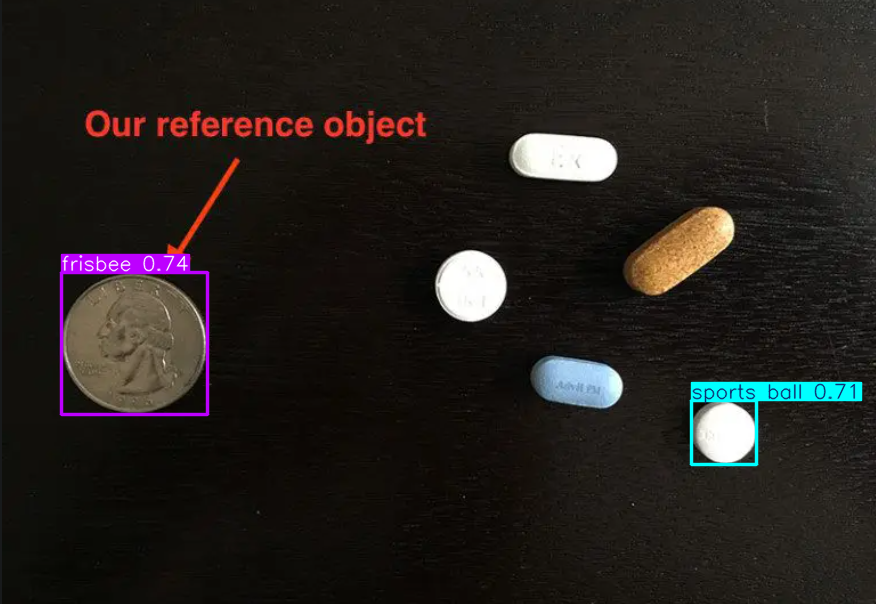

'results_Annotation 2025-01-03 152531.png'

In [118]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolov8n.pt")  # Replace with your model path

# Specify the image path
img_path = "/content/Annotation 2025-01-03 152531.png"  # Replace with your downloaded image path

# Run inference on the image
results = model(img_path, conf=0.25)  # Set confidence threshold to 0.25

# Access the first result (YOLO might return a list of results)
result = results[0]  # Assuming there is only one image, otherwise handle each result

# Show the results (this will display the image with bounding boxes)
result.show()  # Display the image with the detection results

# Optionally, save the results to a file
result.save()  # Saves the results (annotated image) to disk


### Predict with Trained model

#### Object detect predection


image 1/1 /content/Annotation 2025-01-03 152531.png: 448x640 5 circles, 457.3ms
Speed: 3.2ms preprocess, 457.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


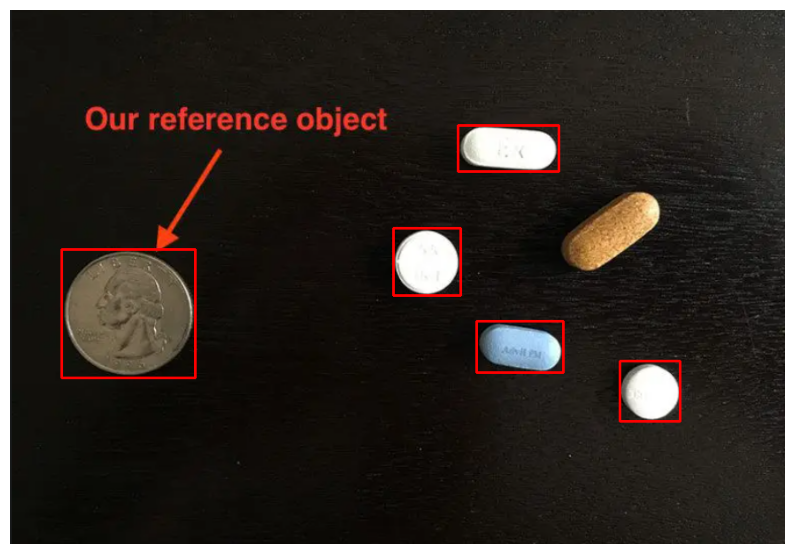

Annotated image saved to /content/annotated_tight_example_01.jpg


In [116]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the YOLOv8 model
model = YOLO("/content/dataset/runs/detect/train/weights/best.pt")  # Replace with your model path

# Specify the image path
img_path = "/content/Annotation 2025-01-03 152531.png"  # Replace with your image path

# Run inference on the image
results = model(img_path, conf=0.25)  # Set confidence threshold to 0.25

# Access the first result (YOLOv8 might return a list of results)
result = results[0]  # Assuming there is only one image, otherwise handle each result

# Extract bounding boxes (xyxy format)
boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates (xyxy)
confidences = result.boxes.conf.cpu().numpy()  # Confidence scores

# Filter out low-confidence predictions (confidence threshold: 0.25)
boxes = boxes[confidences > 0.25]

# Read the original image to draw bounding boxes
image = cv2.imread(img_path)

# Check if segmentation masks are available
masks = result.masks  # Segmentation masks (if available)

if masks is not None:
    # Draw tight bounding boxes using the masks
    for mask in masks:
        # Get the mask as a binary image
        mask_image = mask.numpy().astype(np.uint8) * 255

        # Find contours to get the tightest bounding box around the mask
        contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # Get the tight bounding box around the object (using contours)
            x, y, w, h = cv2.boundingRect(contour)

            # Draw the bounding box on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
else:
    # If no masks, just use the standard bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)  # Convert to integers for drawing
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show the result image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')  # Hide axis
plt.show()

# Optionally, save the results to a file
output_img_path = "/content/annotated_tight_example_01.jpg"
cv2.imwrite(output_img_path, image)  # Save the image with bounding boxes

print(f"Annotated image saved to {output_img_path}")


#### object with dimention prediction


image 1/1 /content/Annotation 2025-01-03 152531.png: 448x640 4 circles, 437.9ms
Speed: 4.2ms preprocess, 437.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


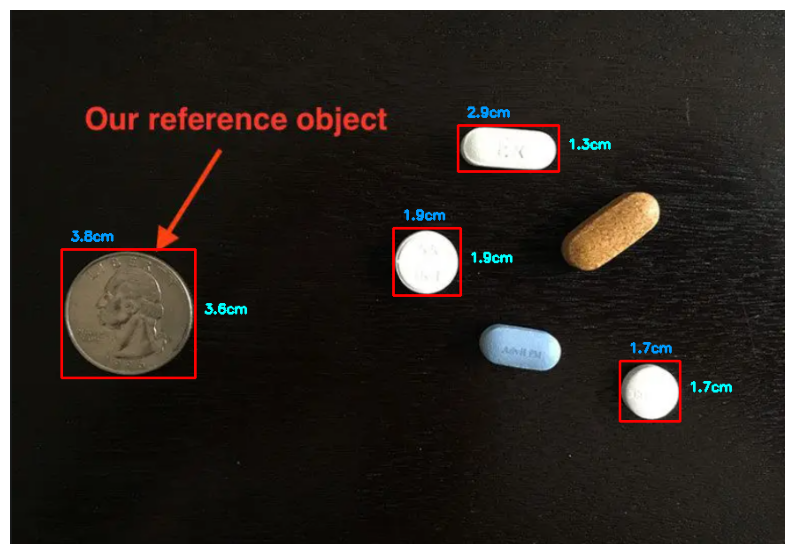

Annotated image saved to /content/annotated_example_01.jpg


In [117]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the YOLO model
model = YOLO("/content/dataset/runs/detect/train/weights/best.pt")  # Replace with your model path

# Specify the image path
img_path = "/content/Annotation 2025-01-03 152531.png"  # Replace with your downloaded image path

# Run inference on the image with a higher confidence threshold and adjusted NMS (IOU)
results = model(img_path, conf=0.5, iou=0.4)  # Set confidence threshold to 0.5 and IOU threshold to 0.4

# Access the first result (YOLO might return a list of results)
result = results[0]  # Assuming there is only one image, otherwise handle each result

# Extract bounding boxes (xyxy format) and confidence scores
boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates (xyxy)
confidences = result.boxes.conf.cpu().numpy()  # Confidence scores

# Filter out low-confidence predictions (confidence threshold: 0.5)
boxes = boxes[confidences > 0.5]

# Read the original image to draw bounding boxes and calculate dimensions
image = cv2.imread(img_path)

# Example reference distance (e.g., 2.5 cm for a reference object in the image)
dist_in_cm = 2.5  # Change based on your reference object

# Calculate pixel-per-cm ratio based on reference object
# You will need to know the width of the reference object in pixels and the real-world size in cm.
# For now, we assume a placeholder value for reference.
ref_width_pixels = 100  # Example: Width of reference object in pixels
pixel_per_cm = ref_width_pixels / dist_in_cm

# Draw bounding boxes and calculate dimensions
for box in boxes:
    x1, y1, x2, y2 = map(int, box)  # Convert to integers for drawing

    # Draw the bounding box on the image
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Calculate width and height in pixels
    width_pixels = x2 - x1
    height_pixels = y2 - y1

    # Convert width and height to real-world dimensions (cm)
    real_width = width_pixels / pixel_per_cm
    real_height = height_pixels / pixel_per_cm

    # Annotate the image with dimensions (in cm) on the right side of the bounding box
    cv2.putText(image, f"{real_width:.1f}cm", (x1 + 10, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 155, 0), 2)

    # Placing the height on the right side of the bounding box
    cv2.putText(image, f"{real_height:.1f}cm", (x2 + 10, y1 + int(height_pixels / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

# Show the result image with bounding boxes and dimensions
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')  # Hide axis
plt.show()

# Optionally, save the results to a file
result.save()  # Saves the results (annotated image) to disk

# Save the annotated image with dimensions to a file
output_img_path = "/content/annotated_example_01.jpg"
cv2.imwrite(output_img_path, image)  # Save the image with bounding boxes and dimensions

print(f"Annotated image saved to {output_img_path}")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving example_01.jpg to example_01.jpg


# Step 1: Detect A4 Page in the Image and Calculate the Scale Factor

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image with object placed on the page
image = cv2.imread("/content/dataset/example_01.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to find contours
_, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through contours and find the page (assuming it's a rectangle)
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # If the contour has four points, it's a potential page
    if len(approx) == 4:
        # Draw the bounding box of the page
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)

        # Compute the width and height of the bounding box (in pixels)
        page_width_pixels = np.linalg.norm(approx[0] - approx[1])  # Distance between two points
        page_height_pixels = np.linalg.norm(approx[1] - approx[2])  # Distance between two points

        print(f"Page Width in Pixels: {page_width_pixels}")
        print(f"Page Height in Pixels: {page_height_pixels}")

        break

# Convert image from BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Turn off the axis
plt.show()


Page Width in Pixels: 2.0
Page Height in Pixels: 1.0


# Download and save model

In [121]:
from google.colab import files
files.download('/content/dataset/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>